In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.8731 - loss: 0.4405
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9652 - loss: 0.1184
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.9784 - loss: 0.0710
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9842 - loss: 0.0531
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9893 - loss: 0.0379


In [1]:
from tensorflow.keras.models import load_model
model=load_model('numPred_model.h5')  # Save as HDF5 format


In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
import numpy as np
test_digits = test_images[0:10]  # shape: (10, 28, 28)

# Flatten the images to (10, 784)
test_digits_flat = test_digits.reshape(10, 784).astype('float32') / 255.0

# Predict
predictions = model.predict(test_digits_flat)
print("Predicted probabilities for first image:", predictions[0])

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Predicted probabilities for first image: [5.3910065e-07 4.3633690e-08 5.7002135e-06 3.5781640e-04 1.1451552e-10
 1.6584760e-08 3.5126981e-11 9.9963474e-01 2.0981192e-07 8.3572229e-07]
Predicted classes: [7 2 1 0 4 1 4 9 5 9]


In [4]:
predictions[2].argmax()

1

In [5]:
train_images.shape

(60000, 28, 28)

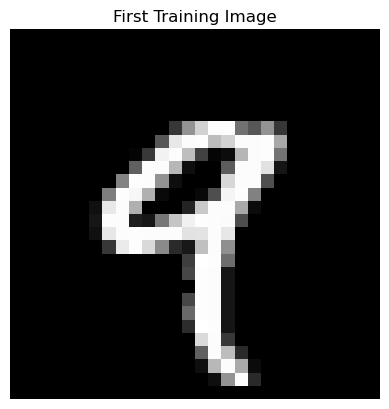

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape all images
images = train_images.reshape(60000, 28, 28)

# Display the first image
plt.imshow(images[4], cmap='gray')
plt.title("First Training Image")
plt.axis('off')  # Hide axis
plt.show()


In [7]:
from keras.models import load_model
from PIL import Image
import numpy as np



# Load external image
img = Image.open('three.png').convert('L')  # Convert to grayscale

# Resize to 28x28
img = img.resize((28, 28))

# Convert to numpy array
img_array = np.array(img)

# Invert colors if needed (MNIST is white digits on black)
img_array = 255 - img_array  

# Normalize to [0,1]
img_array = img_array / 255.0

# Flatten to (1, 784) for Dense model
img_array = img_array.reshape(1, 784).astype('float32')


In [8]:
model.input_shape

(None, 784)

In [9]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print(f"Predicted Digit: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted Digit: 3


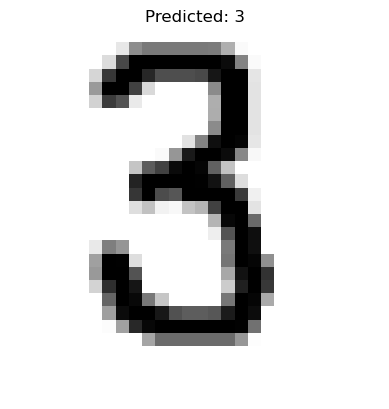

In [10]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [11]:
image_paths = ['one.png', 'two.png', 'three.png','six.png', 'seven.png','eig.png', 'nine.png']

In [12]:
import numpy as np
from PIL import Image

def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')  # Grayscale
    img = img.resize((28, 28))                # Resize to 28x28
    img_array = np.array(img)
    img_array = 255 - img_array               # Invert if needed
    img_array = img_array / 255.0             # Normalize
    img_array = img_array.reshape(784)        # Flatten to (784,)
    return img_array

# Preprocess all images
images_batch = np.array([preprocess_image(path) for path in image_paths]).astype('float32')

print("Batch shape:", images_batch.shape)  # Should be (num_images, 784)


Batch shape: (7, 784)


In [13]:
predictions = model.predict(images_batch)
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted Digits:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicted Digits: [1 2 3 6 7 3 3]


In [9]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ------------------------------
# 1. Load your trained MLP model
# ------------------------------
model = load_model("numPred_model.h5")  # اپنا ماڈل یہاں دیں

# ------------------------------
# 2. Create a blank white canvas
# ------------------------------
canvas = np.ones((400, 400), dtype=np.uint8) * 255
drawing = False

# ------------------------------
# 3. Mouse callback for drawing
# ------------------------------
def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(canvas, (x, y), 12, (0), -1)  # تھوڑی موٹی لائن
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# ------------------------------
# 4. Preprocessing Function
# ------------------------------
def preprocess_for_mlp(img):
    # Step 1: Invert colors (digit white, background black)
    img = 255 - img

    # Step 2: Find bounding box of the digit
    coords = cv2.findNonZero(img)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        digit = img[y:y+h, x:x+w]
    else:
        digit = img  # اگر کچھ نہ لکھا ہو تو original ہی لیں

    # Step 3: Resize digit to 20x20 (MNIST style)
    digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)

    # Step 4: Center digit on 28x28 black canvas
    final_img = np.zeros((28, 28), dtype=np.uint8)
    start_x = (28 - 20) // 2
    start_y = (28 - 20) // 2
    final_img[start_y:start_y+20, start_x:start_x+20] = digit

    # Step 5: Normalize & Flatten for MLP
    final_img = final_img.astype('float32') / 255.0
    final_img = final_img.reshape(1, 784)

    return final_img

# ------------------------------
# 5. OpenCV Drawing Window
# ------------------------------
cv2.namedWindow("Draw Digit")
cv2.setMouseCallback("Draw Digit", draw)

print("Instructions:")
print("  ✏️ Draw a digit with left mouse button")
print("  🔄 Press 'c' to clear canvas")
print("  🔮 Press 'p' to predict digit")
print("  ❌ Press 'q' to quit")

while True:
    cv2.imshow("Draw Digit", canvas)
    key = cv2.waitKey(1) & 0xFF

    # Predict on 'p'
    if key == ord('p'):
        processed_img = preprocess_for_mlp(canvas)
        prediction = model.predict(processed_img)
        predicted_class = np.argmax(prediction)
        print("🎯 Predicted Digit:", predicted_class)

    # Clear on 'c'
    elif key == ord('c'):
        canvas[:] = 255

    # Quit on 'q'
    elif key == ord('q'):
        break

cv2.destroyAllWindows()


Instructions:
  ✏️ Draw a digit with left mouse button
  🔄 Press 'c' to clear canvas
  🔮 Press 'p' to predict digit
  ❌ Press 'q' to quit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
🎯 Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
🎯 Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
🎯 Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
🎯 Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
🎯 Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
🎯 Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
🎯 Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
🎯 Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
🎯 Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
🎯 Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
🎯 Predicted Digit: 3
